<a href="https://colab.research.google.com/github/namtoptall/DataScience/blob/main/transfer2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transfer Learning - Fine tunning

In [73]:
!nvidia-smi

Thu Jul 25 15:24:12 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA L4                      Off | 00000000:00:03.0 Off |                    0 |
| N/A   47C    P0              27W /  72W |   4319MiB / 23034MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [74]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Thu Jul 25 15:24:13 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA L4                      Off | 00000000:00:03.0 Off |                    0 |
| N/A   47C    P0              27W /  72W |   4319MiB / 23034MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [75]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 56.9 gigabytes of available RAM

You are using a high-RAM runtime!


In [76]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [77]:
# take the helperfuncion.py from github
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2024-07-25 15:24:17--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-07-25 15:24:17 (96.4 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]



In [78]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

In [79]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

unzip_data("10_food_classes_10_percent.zip")


--2024-07-25 15:24:17--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.118.207, 74.125.200.207, 74.125.130.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.118.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.1’

10_food_classes_10_ 100%[===================>] 160.74M  21.4MB/s    in 9.0s    

2024-07-25 15:24:27 (17.8 MB/s) - ‘10_food_classes_10_percent.zip.1’ saved [168546183/168546183]



In [80]:
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent

In [81]:
tran_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test"

In [82]:
# create input data
import tensorflow as tf

IMG_SIZE = (224,224)
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(tran_dir,
                                                                label_mode = "categorical",
                                                                image_size = IMG_SIZE,
                                                                batch_size=32)
test_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode = "categorical",
                                                                image_size = IMG_SIZE,
                                                                batch_size=32
                                                                           )

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [83]:
train_data_10_percent

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [84]:
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [85]:
for images, labels in train_data_10_percent.take(1):
  print(images,labels)

tf.Tensor(
[[[[ 36.07143     35.07143     51.07143   ]
   [ 32.59694     31.59694     49.59694   ]
   [ 35.438774    32.438774    53.438774  ]
   ...
   [145.01532    113.87238    115.0051    ]
   [150.14804    114.387825   119.45925   ]
   [154.33145    114.97431    121.04574   ]]

  [[ 32.55102     31.55102     47.55102   ]
   [ 34.785713    33.785713    51.785713  ]
   [ 35.285713    32.285713    53.285713  ]
   ...
   [139.04083    108.48467    105.341835  ]
   [139.28572    105.28573    103.500015  ]
   [147.65833    111.658325   111.801186  ]]

  [[ 28.948978    27.948978    43.94898   ]
   [ 27.80102     26.80102     42.801018  ]
   [ 25.95408     22.95408     41.52551   ]
   ...
   [137.71428    107.974464    99.49998   ]
   [145.14275    112.78561    105.015175  ]
   [132.09183     99.73469     91.45402   ]]

  ...

  [[  2.6429005    9.071428     0.28061998]
   [  8.913334    17.000046     0.        ]
   [ 38.64763     49.6731      11.673163  ]
   ...
   [ 31.857056    13.979

# Mô hình 0: Xây dựng mô hình transfer learning với Keras Functional API


In [86]:
# 1. create model
base_model = tf.keras.applications.EfficientNetB0(include_top=False)

# 2. freeze base model
base_model.trainable = False

In [87]:
#  create output base model
inputs = tf.keras.layers.Input(shape=(224,224,3),name="input_layer")
x = base_model(inputs,training=False)
print(f"shape after passing through base model: {x.shape}")

shape after passing through base model: (None, 7, 7, 1280)


In [88]:
from os import name
# merge output
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f"shape after GlobalAveragePooling2D: {x.shape}")

shape after GlobalAveragePooling2D: (None, 1280)


In [89]:
# activation layer for outpu t
outputs = tf.keras.layers.Dense(10,activation = "softmax",name="output_layer")(x)
print(f"shape after output layer: {outputs.shape}")

shape after output layer: (None, 10)


In [90]:
model_0 = tf.keras.Model(inputs,outputs)

In [91]:
# 9. Biên dịch mô hình
model_0.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# 10. Khớp mô hình (sử dụng ít bước hơn cho validation nên nó nhanh hơn)
history_10_percent = model_0.fit(train_data_10_percent,
                                 epochs=5,
                                 steps_per_epoch=len(train_data_10_percent),
                                 validation_data=test_data_10_percent,
                                 # Đi qua ít dữ liệu kiểm định hơn nên các epoch nhanh hơn (chúng ta muốn thử nghiệm nhanh hơn!)
                                 validation_steps=int(0.25 * len(test_data_10_percent)),
                                 # Theo dõi nhật ký huấn luyện của mô hình cho các trực quan hóa sau này
                                 callbacks=[create_tensorboard_callback("transfer_learning", "10_percent_feature_extract")])


Saving TensorBoard log files to: transfer_learning/10_percent_feature_extract/20240725-152432
Epoch 1/5
24/24 [==============================] - 9s 142ms/step - loss: 1.8571 - accuracy: 0.4333 - val_loss: 1.2996 - val_accuracy: 0.7385
Epoch 2/5
24/24 [==============================] - 2s 74ms/step - loss: 1.0652 - accuracy: 0.7520 - val_loss: 0.8577 - val_accuracy: 0.8224
Epoch 3/5
24/24 [==============================] - 2s 73ms/step - loss: 0.7538 - accuracy: 0.8240 - val_loss: 0.7143 - val_accuracy: 0.8289
Epoch 4/5
24/24 [==============================] - 2s 74ms/step - loss: 0.6069 - accuracy: 0.8613 - val_loss: 0.6172 - val_accuracy: 0.8470
Epoch 5/5
24/24 [==============================] - 2s 74ms/step - loss: 0.5114 - accuracy: 0.8960 - val_loss: 0.5462 - val_accuracy: 0.8701


In [92]:
# view all layers in the base model
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name)

0 input_4
1 rescaling_6
2 normalization_3
3 rescaling_7
4 stem_conv_pad
5 stem_conv
6 stem_bn
7 stem_activation
8 block1a_dwconv
9 block1a_bn
10 block1a_activation
11 block1a_se_squeeze
12 block1a_se_reshape
13 block1a_se_reduce
14 block1a_se_expand
15 block1a_se_excite
16 block1a_project_conv
17 block1a_project_bn
18 block2a_expand_conv
19 block2a_expand_bn
20 block2a_expand_activation
21 block2a_dwconv_pad
22 block2a_dwconv
23 block2a_bn
24 block2a_activation
25 block2a_se_squeeze
26 block2a_se_reshape
27 block2a_se_reduce
28 block2a_se_expand
29 block2a_se_excite
30 block2a_project_conv
31 block2a_project_bn
32 block2b_expand_conv
33 block2b_expand_bn
34 block2b_expand_activation
35 block2b_dwconv
36 block2b_bn
37 block2b_activation
38 block2b_se_squeeze
39 block2b_se_reshape
40 block2b_se_reduce
41 block2b_se_expand
42 block2b_se_excite
43 block2b_project_conv
44 block2b_project_bn
45 block2b_drop
46 block2b_add
47 block3a_expand_conv
48 block3a_expand_bn
49 block3a_expand_activati

## check layers

In [93]:
base_model.summary()


Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 rescaling_6 (Rescaling)     (None, None, None, 3)        0         ['input_4[0][0]']             
                                                                                                  
 normalization_3 (Normaliza  (None, None, None, 3)        7         ['rescaling_6[0][0]']         
 tion)                                                                                            
                                                                                                  
 rescaling_7 (Rescaling)     (None, None, None, 3)        0         ['normalization_3

In [94]:
model_0.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 global_average_pooling_lay  (None, 1280)              0         
 er (GlobalAveragePooling2D                                      
 )                                                               
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4062381 (15.50 MB)
Trainable params: 12810 (50.04 KB)
Non-trainable params: 4049571 (15.45 MB)
________________

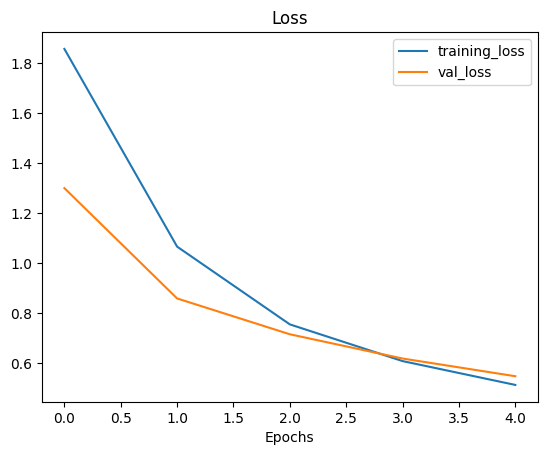

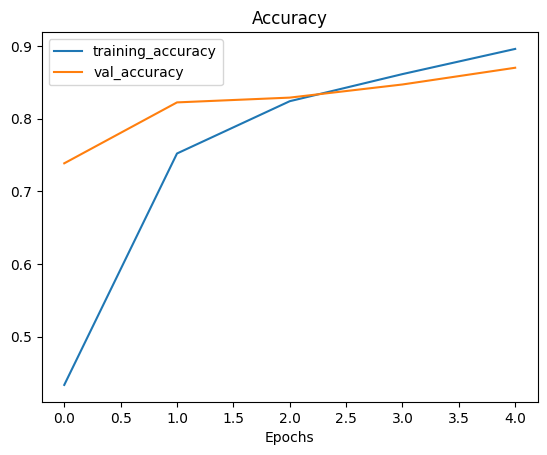

In [95]:
plot_loss_curves(history_10_percent)

# sample average pooling 2d usage

In [96]:
# Định nghĩa input tensor shape (có cùng số chiều như đầu ra của efficientnetb0)
input_shape = (1, 4, 4, 3)

# Tạo random tensor
tf.random.set_seed(42)
input_tensor = tf.random.normal(input_shape)
print(f"Random input tensor:\n {input_tensor}\n")


Random input tensor:
 [[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.2645474 ]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.8917141  -0.93847126]]

  [[ 0.77852213 -0.47338894  0.97772694]
   [ 0.24694404  0.20573746 -0.52562326]
   [ 0.32410017  0.02545409 -0.10638496]
   [-0.63694745  1.1603122   0.2507359 ]]

  [[-0.41728503  0.4012578  -1.4145443 ]
   [-0.5931857  -1.6617213   0.33567193]
   [ 0.10815628  0.23479679 -0.56668764]
   [-0.35819843  0.88698614  0.52744764]]]]



In [97]:
# Truyền random tensor qua global average pooling 2D layer
global_average_pooled_tensor = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print(f"2D global average pooled random tensor:\n {global_average_pooled_tensor}\n")

# Kiểm tra shape của các tensor khác nhau
print(f"Shape of input tensor: {input_tensor.shape}")
print(f"Shape of 2D global averaged pooled input tensor: {global_average_pooled_tensor.shape}")

2D global average pooled random tensor:
 [[-0.09368646 -0.45840448 -0.2885598 ]]

Shape of input tensor: (1, 4, 4, 3)
Shape of 2D global averaged pooled input tensor: (1, 3)


In [98]:
tf.reduce_mean(input_tensor, axis=[1, 2])

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.09368646, -0.45840448, -0.2885598 ]], dtype=float32)>

# model 1 : train 1% data

In [99]:
# Download và giải nén dữ liệu
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
unzip_data("10_food_classes_1_percent.zip")

# Tạo các training/test dir
train_dir_1_percent = "10_food_classes_1_percent/train/"
test_dir = "10_food_classes_1_percent/test/"

--2024-07-25 15:24:50--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.207, 64.233.170.207, 142.251.175.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip.1’

10_food_classes_1_p 100%[===================>] 127.42M  21.6MB/s    in 7.1s    

2024-07-25 15:24:58 (17.9 MB/s) - ‘10_food_classes_1_percent.zip.1’ saved [133612354/133612354]



In [100]:
walk_through_dir("10_food_classes_1_percent")

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/test'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/sushi'

In [101]:
import tensorflow as tf
IMG_SIZE = (224, 224)
train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_1_percent,
                                                                           label_mode="categorical",
                                                                           batch_size=32, # mặc định
                                                                           image_size=IMG_SIZE)
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE)


Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [102]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [103]:
data_augmentation = keras.Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
    # preprocessing.Rescaling(1./255)
], name="data_augmentation")

Text(0.5, 1.0, 'Randomly selected chicken_wings image')

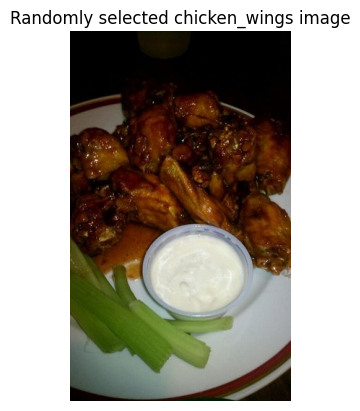

In [104]:
# check an random image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
target_class = random.choice(train_data_1_percent.class_names)  # pick a random class
target_dir = "10_food_classes_1_percent/train/" + target_class  # create the target directory
random_image = random.choice(os.listdir(target_dir))  # choose a random image from the target directory
random_image_path = target_dir + "/" + random_image  # create the image path
img = mpimg.imread(random_image_path)  # read in the image with matplotlib
plt.imshow(img)  # plot the image
plt.axis("off")  # turn off the axes
plt.title(f"Randomly selected {target_class} image")  # add a title


Text(0.5, 1.0, 'Augmented image')

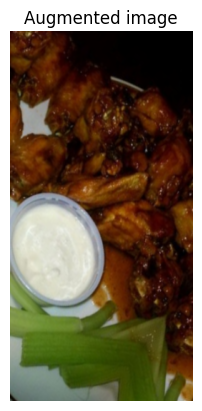

In [105]:
augmented_img = data_augmentation(tf.expand_dims(img,axis=0))
plt.figure()
plt.imshow(tf.squeeze(augmented_img)/255.)
plt.axis("off")
plt.title("Augmented image")

## Mô hình 1: Feature extraction transfer learning trên 1% dữ liệu với data augmentation


In [106]:
# set input shape and freeze layer
input_shape = (224,224,3)
base_model =tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

# create input layer
inputs1 = tf.keras.layers.Input(shape=input_shape,name="input_layer")

In [107]:
# adding data augmentation
x = data_augmentation(inputs1)
# add input ionto base model
x = base_model(x,training=False)
# merge output
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
# dense output
outputs1 = layers.Dense(10,activation="softmax",name="output_layer")(x)
# create full model 1
model_1 = tf.keras.Model(inputs1,outputs1)

In [108]:
# Biên dịch mô hình
model_1.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Khớp mô hình
history_1_percent = model_1.fit(train_data_1_percent,
                    epochs=5,
                    steps_per_epoch=len(train_data_1_percent),
                    validation_data=test_data,
                    validation_steps=int(0.25* len(test_data)), # xác thực cho ít bước hơn
                    # Theo dõi nhật ký huấn luyện mô hình
                    callbacks=[create_tensorboard_callback("transfer_learning", "1_percent_data_aug")])


Saving TensorBoard log files to: transfer_learning/1_percent_data_aug/20240725-152503
Epoch 1/5
3/3 [==============================] - 10s 1s/step - loss: 2.3543 - accuracy: 0.1000 - val_loss: 2.2278 - val_accuracy: 0.1743
Epoch 2/5
3/3 [==============================] - 1s 486ms/step - loss: 2.1492 - accuracy: 0.2857 - val_loss: 2.1292 - val_accuracy: 0.2648
Epoch 3/5
3/3 [==============================] - 1s 496ms/step - loss: 1.9431 - accuracy: 0.4571 - val_loss: 1.9929 - val_accuracy: 0.3766
Epoch 4/5
3/3 [==============================] - 1s 498ms/step - loss: 1.7406 - accuracy: 0.6000 - val_loss: 1.8774 - val_accuracy: 0.4391
Epoch 5/5
3/3 [==============================] - 1s 486ms/step - loss: 1.6063 - accuracy: 0.7714 - val_loss: 1.7956 - val_accuracy: 0.4836


In [109]:
model_1.summary()


Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequent  (None, None, None, 3)     0         
 ial)                                                            
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 global_average_pooling_lay  (None, 1280)              0         
 er (GlobalAveragePooling2D                                      
 )                                                               
                                                                 
 output_layer (Dense)        (None, 10)                1281

In [110]:
# Đánh giá trên dữ liệu kiểm tra
results_1_percent_data_aug = model_1.evaluate(test_data)
results_1_percent_data_aug

79/79 [==============================] - 3s 40ms/step - loss: 1.8104 - accuracy: 0.4840


[1.8104208707809448, 0.48399999737739563]

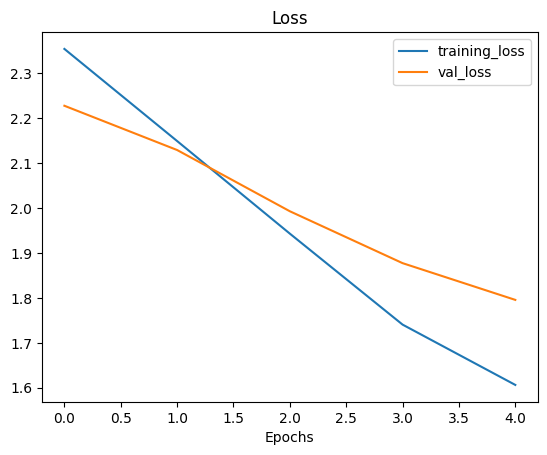

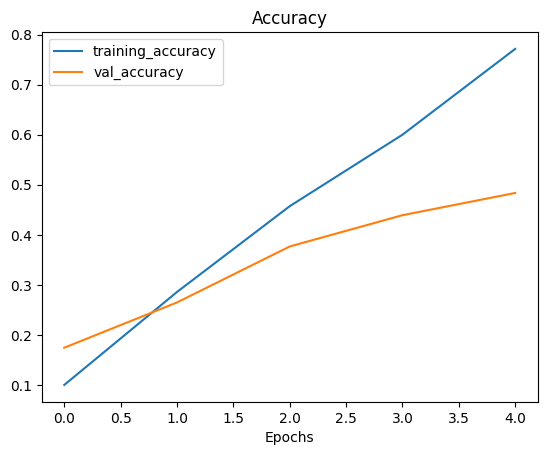

In [111]:
# Mô hình hoạt động thế nào với layer tăng cường dữ liệu chỉ có 1% dữ liệu
plot_loss_curves(history_1_percent)

# Mô hình 2: Feature extraction transfer learning với 10% dữ liệu và data augmentation


In [112]:
# Lấy 10% dữ liệu của 10 lớp (không chú thích nếu chưa có  "10_food_classes_10_percent.zip")
# !wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
# unzip_data("10_food_classes_10_percent.zip")

train_dir_10_percent = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

In [113]:
# Thiết lập đầu vào dữ liệu
import tensorflow as tf
IMG_SIZE = (224, 224)
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_10_percent,
                                                                            label_mode="categorical",
                                                                            image_size=IMG_SIZE)
# Lưu ý: dữ liệu kiểm tra tương tự như trong thử nghiệm trước, chúng ta có thể
# bỏ qua việc tạo điều này nhưng hãy để đây để thực hành.
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [114]:
# Tạo mô hình functional với data augmentation
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential

# Xây dựng layer tăng cường dữ liệu
data_augmentation = Sequential([
  preprocessing.RandomFlip('horizontal'),
  preprocessing.RandomHeight(0.2),
  preprocessing.RandomWidth(0.2),
  preprocessing.RandomZoom(0.2),
  preprocessing.RandomRotation(0.2),
  # preprocessing.Rescaling(1./255) # giữ cho ResNet50V2, loại khỏi EfficientNet
], name="data_augmentation")

# Thiết lập shape đầu vào cho mô hình
input_shape = (224, 224, 3)

# Tạo base model đã đóng băng
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

# Tạo các layer đầu vào và đầu ra
inputs = layers.Input(shape=input_shape, name="input_layer") # tạo layer đầu vào
x = data_augmentation(inputs) # tăng cường ảnh huấn luyện
x = base_model(x, training=False) # truyền các ảnh đã tăng cường vào base model nhưng giữ nó ở chế độ suy luận, nên các batchnorm layer không cập nhật: https://keras.io/guides/transfer_learning/#build-a-model
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)
model_2 = tf.keras.Model(inputs, outputs)

# Biên dịch
model_2.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # sử dụng thuật tóa tối ưu Adam với learning rate cơ sở
              metrics=["accuracy"])

In [115]:
# Thiết lập đường dẫn checkpoint
checkpoint_path = "ten_percent_model_checkpoints_weights/checkpoint.ckpt" # lưu ý: nhớ rằng việc lưu trực tiếp vào Colab chỉ là tạm thời

# Tạo ModelCheckpoint callback chỉ để lưu các trọn số của mô hình
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True, # đặt là False để lưu toàn bộ mô hình
                                                         save_best_only=False, # đặt là True để chỉ lưu những mô hình tốt nhất thay vì một mô hình mỗi epoch
                                                         save_freq="epoch", # lưu mọi epoch
                                                         verbose=1)


In [116]:
# Khớp mô hình lưu checkpoint mỗi epoch
initial_epochs = 5
history_10_percent_data_aug = model_2.fit(train_data_10_percent,
                                          epochs=initial_epochs,
                                          validation_data=test_data,
                                          validation_steps=int(0.25 * len(test_data)), # thực hiện ít bước hơn mỗi validation (nhanh hơn)
                                          callbacks=[create_tensorboard_callback("transfer_learning", "10_percent_data_aug"),
                                                     checkpoint_callback])

Saving TensorBoard log files to: transfer_learning/10_percent_data_aug/20240725-152524
Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 1.9696 - accuracy: 0.3600
Epoch 1: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 12s 229ms/step - loss: 1.9696 - accuracy: 0.3600 - val_loss: 1.3972 - val_accuracy: 0.7023
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.2942 - accuracy: 0.6973
Epoch 2: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 4s 162ms/step - loss: 1.2942 - accuracy: 0.6973 - val_loss: 0.9710 - val_accuracy: 0.8125
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 0.9823 - accuracy: 0.7773
Epoch 3: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 4s 164ms/step - loss: 0.9823 - accuracy: 0.7773 - val_loss: 0.7696 - val_accuracy: 0.8207
Epo

In [117]:
results_10_percent_data_aug = model_2.evaluate(test_data)
results_10_percent_data_aug

79/79 [==============================] - 3s 38ms/step - loss: 0.6210 - accuracy: 0.8440


[0.6210383176803589, 0.843999981880188]

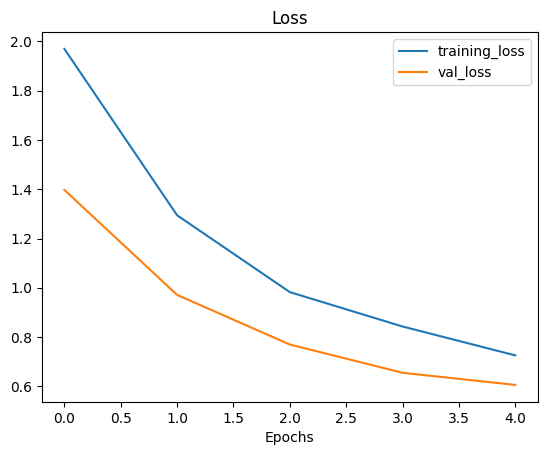

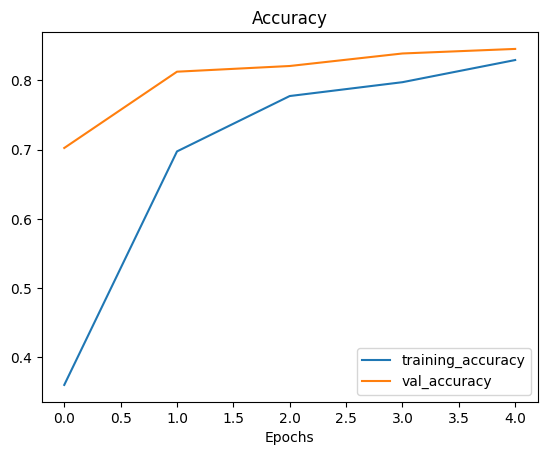

In [118]:
plot_loss_curves(history_10_percent_data_aug)

In [119]:
model_2.load_weights(checkpoint_path)
loaded_weights_model_results = model_2.evaluate(test_data)
results_10_percent_data_aug = loaded_weights_model_results


79/79 [==============================] - 3s 38ms/step - loss: 0.6210 - accuracy: 0.8440


In [120]:
import numpy as np
# Kiểm tra xem liệu kết quả của mô hình đã load có rất gần với kết quả của mô hình ban đầu không (nên xuất ra True)
np.isclose(np.array(results_10_percent_data_aug), np.array(loaded_weights_model_results))

# Kiểm tra hiệu số giữa hai kết quả
print(np.array(results_10_percent_data_aug) - np.array(loaded_weights_model_results))

[0. 0.]


In [121]:
model_2.layers


In [122]:
for layer in model_2.layers:
  print(layer, layer.trainable)


<keras.src.engine.input_layer.InputLayer object at 0x7c6c42cf3070> True
<keras.src.engine.sequential.Sequential object at 0x7c6e540ff580> True
<keras.src.engine.functional.Functional object at 0x7c6c38d13730> False
<keras.src.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x7c6c38ee1de0> True
<keras.src.layers.core.dense.Dense object at 0x7c6c38d25000> True


In [123]:
model_2.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequent  (None, None, None, 3)     0         
 ial)                                                            
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 global_average_pooling_lay  (None, 1280)              0         
 er (GlobalAveragePooling2D                                      
 )                                                               
                                                                 
 output_layer (Dense)        (None, 10)                1281

In [124]:
# print out the trainable layers
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name, layer.trainable)
# print number of true layers
print(len(base_model.trainable_variables))

0 input_6 False
1 rescaling_10 False
2 normalization_5 False
3 rescaling_11 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fa

# Mô hình 3: Tinh chỉnh mô hình hiện có với 10% dữ liệu


In [125]:
base_model.trainable = True

In [126]:
# freeze layers except first-10-layers
for layer in base_model.layers[:-10]:
    layer.trainable = False

# compile the model again
model_2.compile(loss="categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001), # learning rate thấp hơn
                metrics=["accuracy"])

In [127]:
for layer_number, layer in enumerate(base_model.layers):
    print(layer_number, layer.name, layer.trainable)

0 input_6 False
1 rescaling_10 False
2 normalization_5 False
3 rescaling_11 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fa

In [128]:
print(len(model_2.trainable_variables))

12


In [129]:
fine_tune_epochs = initial_epochs + 5
# fit the model
hisstory_fine_10_percent_data_aug = model_2.fit(train_data_10_percent,
                                                epochs = fine_tune_epochs,
                                                validation_data=test_data,
                                                initial_epoch=history_10_percent_data_aug.epoch[-1], # let start from the last epoch
                                                validation_steps=int(0.25 * len(test_data)),
                                                callbacks=[create_tensorboard_callback("transfer_learning", "10_percent_fine_tune")],
                                                )

Saving TensorBoard log files to: transfer_learning/10_percent_fine_tune/20240725-152600
Epoch 5/10
24/24 [==============================] - 27s 801ms/step - loss: 0.5927 - accuracy: 0.8480 - val_loss: 0.4478 - val_accuracy: 0.8602
Epoch 6/10
24/24 [==============================] - 17s 686ms/step - loss: 0.5209 - accuracy: 0.8493 - val_loss: 0.4359 - val_accuracy: 0.8684
Epoch 7/10
24/24 [==============================] - 16s 673ms/step - loss: 0.4160 - accuracy: 0.8773 - val_loss: 0.4057 - val_accuracy: 0.8734
Epoch 8/10
24/24 [==============================] - 16s 668ms/step - loss: 0.3741 - accuracy: 0.8853 - val_loss: 0.4251 - val_accuracy: 0.8635
Epoch 9/10
24/24 [==============================] - 17s 677ms/step - loss: 0.3736 - accuracy: 0.8827 - val_loss: 0.4071 - val_accuracy: 0.8651
Epoch 10/10
24/24 [==============================] - 15s 630ms/step - loss: 0.3189 - accuracy: 0.9107 - val_loss: 0.4302 - val_accuracy: 0.8668


In [130]:
results_finetune = model_2.evaluate(test_data)

79/79 [==============================] - 3s 39ms/step - loss: 0.4468 - accuracy: 0.8524


In [131]:
# compare history
def compare_histories(original_history, new_history, initial_epochs=5):
    """
    Compares two TensorFlow History objects.
    """
    acc = original_history.history['accuracy']
    loss = original_history.history['loss']

    print(len(acc))

    val_acc = original_history.history['val_accuracy']
    val_loss = original_history.history['val_loss']

    total_acc = acc + new_history.history['accuracy']
    total_loss = loss + new_history.history['loss']
    total_val_acc = val_acc + new_history.history['val_accuracy']
    total_val_loss = val_loss + new_history.history['val_loss']
    print(len(total_acc))
    print(total_acc)

    # create the plot
    plt.figure(figsize=(8, 8))
    plt.subplot(2,1,1)
    plt.plot(total_acc, label='Training Accuracy')
    plt.plot(total_val_acc, label='Validation Accuracy')
    plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(), label='Start Fine Tuning') # plot a dotted line
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(2,1,2)
    plt.plot(total_loss, label='Training Loss')
    plt.plot(total_val_loss, label='Validation Loss')
    plt.plot([initial_epochs-1,initial_epochs-1],
             plt.ylim(), label='Start Fine Tuning')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

5
11
[0.36000001430511475, 0.6973333358764648, 0.7773333191871643, 0.7973333597183228, 0.8293333053588867, 0.8479999899864197, 0.8493333458900452, 0.8773333430290222, 0.8853333592414856, 0.8826666474342346, 0.9106666445732117]


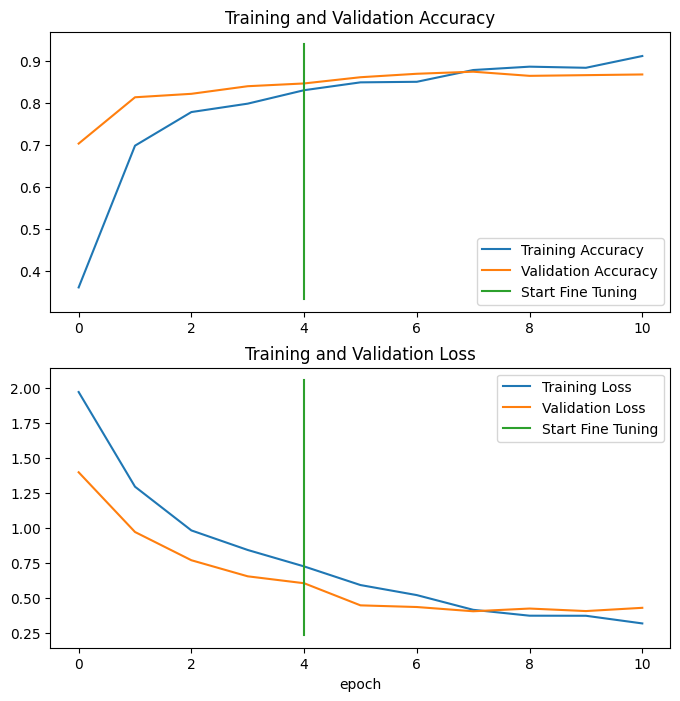

In [132]:
compare_histories(history_10_percent_data_aug, hisstory_fine_10_percent_data_aug,initial_epochs=5)

# Mô hình 4: Fine-tuning mô hình có sẵn với toàn bộ dữ liệu


In [133]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
unzip_data("10_food_classes_all_data.zip")

# Thiết lập directory dữ liệu
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"
walk_through_dir("10_food_classes_all_data")


--2024-07-25 15:27:51--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.12.207, 172.253.118.207, 74.125.200.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.12.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.1’

10_food_classes_all 100%[===================>] 495.13M  20.7MB/s    in 24s     

2024-07-25 15:28:16 (20.9 MB/s) - ‘10_food_classes_all_data.zip.1’ saved [519183241/519183241]

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_

In [134]:
# Thiết lập đầu vào dữ liệu
import tensorflow as tf
IMG_SIZE = (224, 224)
train_data_10_classes_full = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                                 label_mode="categorical",
                                                                                 image_size=IMG_SIZE)

# Lưu ý: đây là cùng một tập kiểm tra mà chúng ta đã sử dụng cho thử nghiệm lập mô hình trước
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE)

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [135]:
model_2.evaluate(test_data)

79/79 [==============================] - 3s 39ms/step - loss: 0.4468 - accuracy: 0.8524


[0.4468207061290741, 0.852400004863739]

In [137]:
print(results_10_percent_data_aug)

[0.6210381388664246, 0.843999981880188]


In [138]:
for layer_number, layer in enumerate(model_2.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_layer True
1 data_augmentation True
2 efficientnetb0 True
3 global_average_pooling_layer True
4 output_layer True


In [139]:
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_6 False
1 rescaling_10 False
2 normalization_5 False
3 rescaling_11 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fa

In [140]:
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), # chia learning rate cho 10 cho fine-tuning
                metrics=["accuracy"])

fine_tune_epochs = initial_epochs + 5

history_fine_10_classes_full = model_2.fit(train_data_10_classes_full,
                                           epochs=fine_tune_epochs,
                                           initial_epoch=history_10_percent_data_aug.epoch[-1],
                                           validation_data=test_data,
                                           validation_steps=int(0.25 * len(test_data)),
                                           callbacks=[create_tensorboard_callback("transfer_learning", "full_10_classes_fine_tune_last_10")])


Saving TensorBoard log files to: transfer_learning/full_10_classes_fine_tune_last_10/20240725-153124
Epoch 5/10
235/235 [==============================] - 131s 526ms/step - loss: 0.6303 - accuracy: 0.7964 - val_loss: 0.3419 - val_accuracy: 0.8947
Epoch 6/10
235/235 [==============================] - 103s 438ms/step - loss: 0.4211 - accuracy: 0.8631 - val_loss: 0.3010 - val_accuracy: 0.8947
Epoch 7/10
235/235 [==============================] - 85s 362ms/step - loss: 0.3454 - accuracy: 0.8863 - val_loss: 0.3046 - val_accuracy: 0.9062
Epoch 8/10
235/235 [==============================] - 75s 317ms/step - loss: 0.2890 - accuracy: 0.9040 - val_loss: 0.3399 - val_accuracy: 0.9095
Epoch 9/10
235/235 [==============================] - 67s 285ms/step - loss: 0.2389 - accuracy: 0.9200 - val_loss: 0.3276 - val_accuracy: 0.9062
Epoch 10/10
235/235 [==============================] - 66s 282ms/step - loss: 0.2130 - accuracy: 0.9292 - val_loss: 0.3626 - val_accuracy: 0.8865


In [141]:
results_fine_tune_full_data = model_2.evaluate(test_data)
results_fine_tune_full_data

79/79 [==============================] - 3s 39ms/step - loss: 0.3353 - accuracy: 0.8936


[0.33533570170402527, 0.8935999870300293]

5
11
[0.36000001430511475, 0.6973333358764648, 0.7773333191871643, 0.7973333597183228, 0.8293333053588867, 0.7964000105857849, 0.8630666732788086, 0.8862666487693787, 0.9039999842643738, 0.9200000166893005, 0.9291999936103821]


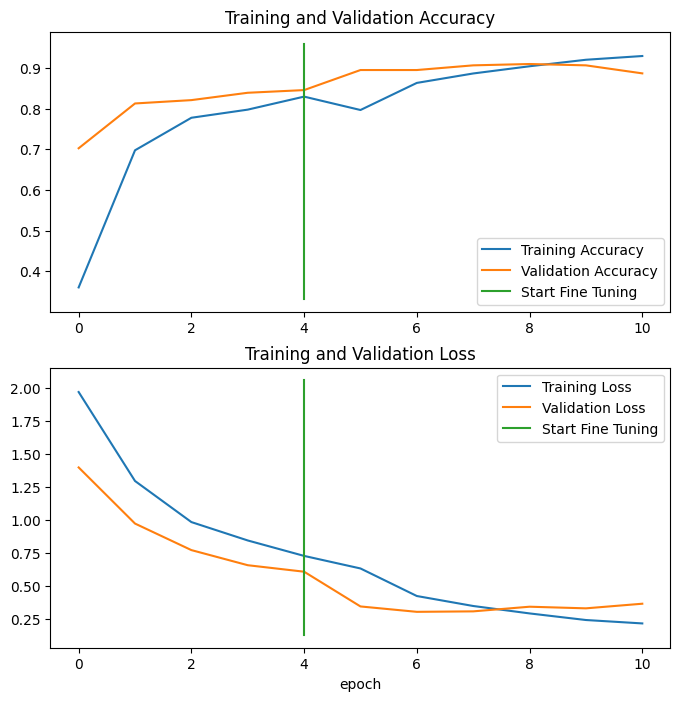

In [142]:
compare_histories(original_history=history_10_percent_data_aug,
                 new_history=history_fine_10_classes_full,
                 initial_epochs=5)

## 🛠 Bài tập thực hành
> **Lưu ý:** Các bạn cần làm phần bài tập này để chuẩn bị cho phiên review lab.

1. Viết một hàm để hiển thị ảnh từ tập dữ liệu và lớp bất kỳ (chẳng hạn: "steak", "pizza"...), trực quan hóa nó và đưa ra dự đoán sử dụng mô hình đã huấn luyện.
2. Sử dụng feature-extraction để huấn luyện mô hình transfer learning trên 10% dữ liệu Food Vision cho 10 epoch, sử dụng [`tf.keras.applications.EfficientNetB0`](https://www.tensorflow.org/api_docs/python/tf/keras/applications/EfficientNetB0) làm base model. Dùng [`ModelCheckpoint`](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint) callback để lưu trọng số vào file.
3. Tinh chỉnh 20 layer cuối của base model mà bạn đã huấn luyện ở 2 cho 10 epoch khác. Nó diễn ra thế nào?
4. Tinh chỉnh 30 layer cuối của base model mà bạn đã huấn luyện ở 2 cho 10 epoch khác. Nó diễn ra thế nào?

### 1

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
import tensorflow as tf


In [146]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                 label_mode="categorical",
                                                                 image_size=IMG_SIZE)
class_names = train_data.class_names

Found 7500 files belonging to 10 classes.


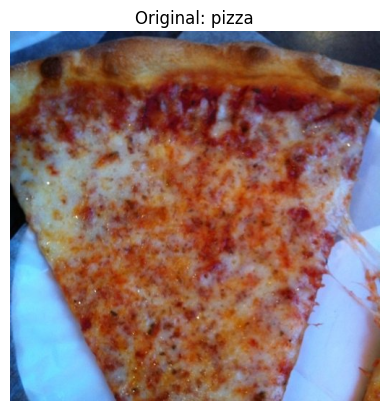

1/1 [==============================] - 0s 29ms/step
Predicted: pizza


In [147]:
def show_and_predict(model, class_name, folder_path="10_food_classes_all_data/test/"):
    # Xác định thư mục chứa ảnh của lớp được chỉ định
    target_dir = os.path.join(folder_path, class_name)
    # Chọn ngẫu nhiên một ảnh từ thư mục
    random_image = random.choice(os.listdir(target_dir))
    random_image_path = os.path.join(target_dir, random_image)
    # Đọc và hiển thị ảnh
    img = mpimg.imread(random_image_path)
    plt.imshow(img)
    plt.title(f"Original: {class_name}")
    plt.axis(False)
    plt.show()
    # Chuẩn bị ảnh cho việc dự đoán
    img_array = tf.keras.preprocessing.image.img_to_array(img)  # Chuyển ảnh thành mảng
    img_array = tf.image.resize(img_array, [224, 224])  # Thay đổi kích thước ảnh để phù hợp với đầu vào của mô hình
    img_array = tf.expand_dims(img_array, 0)  # Tạo batch cho ảnh

    # Dự đoán và hiển thị lớp dự đoán
    predictions = model.predict(img_array)
    predicted_class = class_names[tf.argmax(predictions[0])]  # Lấy chỉ số của lớp có xác suất cao nhất
    print(f"Predicted: {predicted_class}")

# Example usage
# Assuming `model` is your trained model and `class_names` are the class names used in the model
show_and_predict(model_2, "pizza")


### 2

In [151]:
# define model
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [155]:
# Cài đặt ModelCheckpoint để lưu trọng số mô hình sau mỗi epoch
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="ten_percent_model_checkpoints_weights/checkpoint.ckpt",  # Đường dẫn lưu trọng số
    save_weights_only=True,  # Chỉ lưu trọng số, không lưu cấu trúc mô hình
    save_best_only=False,  # Lưu trọng số sau mỗi epoch mà không phân biệt tốt nhất
    save_freq="epoch",  # Tần suất lưu là sau mỗi epoch
    verbose=1)

# compile the model
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])
# Huấn luyện mô hình với callback lưu trọng số
history = model.fit(train_data_10_percent, epochs=10, validation_data=test_data,
                    callbacks=[checkpoint_callback])


Epoch 1/10
23/24 [===========================>..] - ETA: 0s - loss: 0.0872 - accuracy: 0.9878
Epoch 1: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 14s 253ms/step - loss: 0.0859 - accuracy: 0.9880 - val_loss: 0.3912 - val_accuracy: 0.8744
Epoch 2/10
23/24 [===========================>..] - ETA: 0s - loss: 0.0637 - accuracy: 0.9810
Epoch 2: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 4s 185ms/step - loss: 0.0639 - accuracy: 0.9813 - val_loss: 0.3959 - val_accuracy: 0.8804
Epoch 3/10
23/24 [===========================>..] - ETA: 0s - loss: 0.0561 - accuracy: 0.9851
Epoch 3: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 4s 185ms/step - loss: 0.0561 - accuracy: 0.9853 - val_loss: 0.4866 - val_accuracy: 0.8640
Epoch 4/10
23/24 [===========================>..] - ETA: 0s - loss: 0.0213 - accuracy: 

### 3&4

In [156]:
# Mở khóa 20 layer cuối cùng để tinh chỉnh
base_model.trainable = True
for layer in base_model.layers[:-20]:
    layer.trainable = False

# Biên dịch lại mô hình với learning rate thấp hơn cho tinh chỉnh
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  # Giảm learning rate
              metrics=["accuracy"])

# Tinh chỉnh mô hình
history_fine_20 = model.fit(train_data_10_percent, epochs=10, validation_data=test_data)


Epoch 1/10
24/24 [==============================] - 14s 236ms/step - loss: 0.0172 - accuracy: 0.9960 - val_loss: 0.5123 - val_accuracy: 0.8728
Epoch 2/10
24/24 [==============================] - 4s 171ms/step - loss: 0.0110 - accuracy: 0.9973 - val_loss: 0.4835 - val_accuracy: 0.8784
Epoch 3/10
24/24 [==============================] - 4s 172ms/step - loss: 0.0091 - accuracy: 0.9960 - val_loss: 0.4680 - val_accuracy: 0.8780
Epoch 4/10
24/24 [==============================] - 4s 170ms/step - loss: 0.0134 - accuracy: 0.9960 - val_loss: 0.4523 - val_accuracy: 0.8796
Epoch 5/10
24/24 [==============================] - 4s 171ms/step - loss: 0.0100 - accuracy: 0.9947 - val_loss: 0.4431 - val_accuracy: 0.8840
Epoch 6/10
24/24 [==============================] - 4s 171ms/step - loss: 0.0061 - accuracy: 1.0000 - val_loss: 0.4326 - val_accuracy: 0.8856
Epoch 7/10
24/24 [==============================] - 4s 171ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.4247 - val_accuracy: 0.8880
Epoch

In [157]:
for layer in base_model.layers[:-30]:
    layer.trainable = False

model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=["accuracy"])

history_fine_30 = model.fit(train_data_10_percent, epochs=10, validation_data=test_data)


Epoch 1/10
24/24 [==============================] - 14s 234ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.4052 - val_accuracy: 0.8916
Epoch 2/10
24/24 [==============================] - 4s 173ms/step - loss: 0.0078 - accuracy: 0.9960 - val_loss: 0.4062 - val_accuracy: 0.8920
Epoch 3/10
24/24 [==============================] - 4s 173ms/step - loss: 0.0080 - accuracy: 0.9973 - val_loss: 0.4091 - val_accuracy: 0.8900
Epoch 4/10
24/24 [==============================] - 4s 175ms/step - loss: 0.0029 - accuracy: 0.9987 - val_loss: 0.4065 - val_accuracy: 0.8944
Epoch 5/10
24/24 [==============================] - 4s 172ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.4017 - val_accuracy: 0.8948
Epoch 6/10
24/24 [==============================] - 4s 173ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.4008 - val_accuracy: 0.8940
Epoch 7/10
24/24 [==============================] - 4s 172ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.4011 - val_accuracy: 0.8944
Epoch

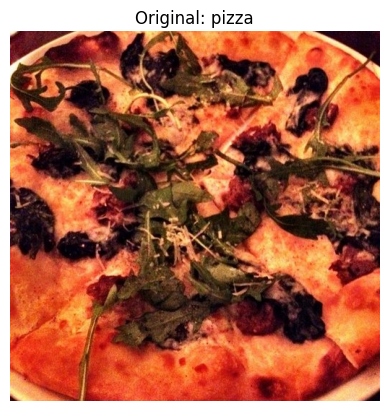

1/1 [==============================] - 1s 1s/step
Predicted: pizza


In [158]:
# plot the result
show_and_predict(model, "pizza")